In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA
from sklearn.datasets import load_boston
from sklearn.datasets import make_blobs

#### Define an interface of plotting:

In [7]:
def plot_api(width=10, length=8):
    fig, ax = plt.subplots(figsize=(width,length))
    return fig, ax

#### Simulate a data set for clustering

In [13]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
#print(X)

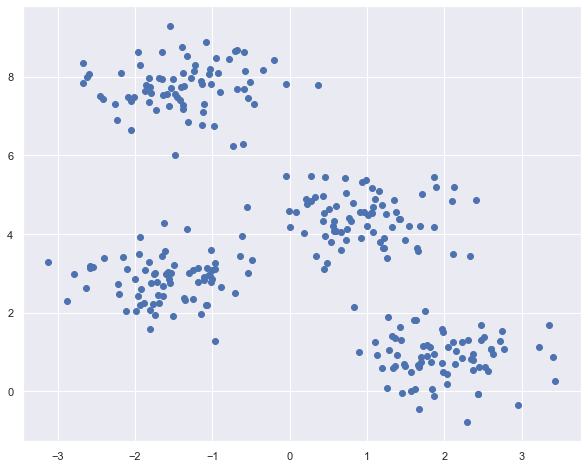

In [14]:
fig, ax = plot_api()
ax.scatter(X[:,0], X[:,1])

112.58738002972932
0.34901400412898737
[1 0 5 8 1 6 7 5 8 8 7 0 5 0 9 3 5 6 4 7 6 1 3 2 7 3 9 3 2 3 8 0 5 0 0 0 0
 0 7 9 3 7 3 5 7 4 8 7 0 1 2 6 8 9 1 4 8 7 0 1 0 3 8 4 2 4 0 6 0 4 5 4 8 4
 7 8 2 5 9 8 9 3 1 1 8 3 6 3 0 0 3 9 0 2 4 5 1 6 3 2 8 9 8 6 5 6 9 5 0 3 7
 4 9 0 9 5 0 1 1 3 4 9 4 9 1 6 9 7 1 7 8 7 7 9 0 7 2 0 3 8 0 4 5 4 5 7 0 3
 0 0 0 3 0 3 9 4 8 7 9 5 0 3 3 1 3 2 7 3 1 5 5 8 9 5 4 8 6 6 3 4 6 5 2 4 3
 5 5 3 6 0 3 4 5 3 7 7 2 5 7 0 5 4 9 7 5 0 4 8 5 0 5 7 3 5 0 4 4 9 6 3 0 6
 9 2 9 2 3 8 8 5 5 8 3 1 4 3 9 4 8 2 6 3 6 0 0 0 0 4 4 0 5 4 9 3 2 2 4 9 6
 0 3 3 2 9 8 4 5 8 3 6 9 2 7 5 6 9 1 5 8 0 6 6 5 6 6 6 0 4 8 3 9 1 0 8 8 1
 6 3 8 7]


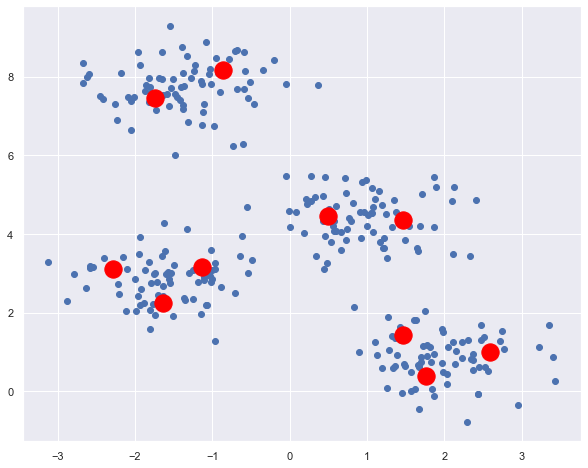

In [23]:
kmeans = KMeans(10, random_state=0)
labels = kmeans.fit(X).predict(X)
#print(labels)
print(kmeans.inertia_)
score = silhouette_score(X, kmeans.labels_)
print(score)
print(labels)
fig, ax = plot_api()
ax.scatter(X[:,0], X[:,1])
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')


In [30]:
gm = GaussianMixture(n_components=4).fit(X)
labels = gm.predict(X)
print(labels)
AIC = gm.aic(X)
BIC = gm.bic(X)
print(AIC)
print(BIC)


[2 1 0 1 2 2 3 0 1 1 3 1 0 1 2 0 0 2 3 3 2 2 0 3 3 0 2 0 3 0 1 1 0 1 1 1 1
 1 3 2 0 3 0 0 3 3 1 3 1 2 3 2 1 2 2 3 1 3 1 2 1 0 1 3 3 3 1 2 1 3 0 3 1 3
 3 1 3 0 2 1 2 0 2 2 1 0 2 0 1 1 0 2 1 3 3 0 2 2 0 3 1 2 1 2 0 2 2 0 1 0 3
 3 2 1 2 0 1 2 2 0 3 2 3 2 2 2 2 3 2 3 1 3 3 2 1 3 3 1 0 1 1 3 0 3 0 3 1 0
 1 1 1 0 1 0 2 3 1 3 2 0 1 0 0 2 0 3 3 0 2 0 0 1 2 0 3 1 2 2 0 3 2 0 3 3 0
 0 0 0 2 1 0 3 0 0 3 3 3 0 3 1 0 3 2 3 0 1 3 1 0 1 0 3 0 0 1 3 3 2 2 0 1 2
 2 3 2 3 0 1 1 0 0 1 0 2 3 0 2 3 1 3 2 0 2 1 1 1 1 3 3 1 0 3 2 0 3 3 3 2 2
 1 0 0 3 2 1 3 0 1 0 2 2 3 3 0 2 2 2 0 1 1 2 2 0 2 2 2 1 3 1 0 2 2 1 1 1 2
 2 0 1 3]
[2 1 0 1 2 2 3 0 1 1 3 1 0 1 2 0 0 2 3 3 2 2 0 3 3 0 2 0 3 0 1 1 0 1 1 1 1
 1 3 2 0 3 0 0 3 3 1 3 1 2 3 2 1 2 2 3 1 3 1 2 1 0 1 3 3 3 1 2 1 3 0 3 1 3
 3 1 3 0 2 1 2 0 2 2 1 0 2 0 1 1 0 2 1 3 3 0 2 2 0 3 1 2 1 2 0 2 2 0 1 0 3
 3 2 1 2 0 1 2 2 0 3 2 3 2 2 2 2 3 2 3 1 3 3 2 1 3 3 1 0 1 1 3 0 3 0 3 1 0
 1 1 1 0 1 0 2 3 1 3 2 0 1 0 0 2 0 3 3 0 2 0 0 1 2 0 3 1 2 2 0 3 2 0 3 3 0
 0 0 0 2 1 0 3 

#### Simulate data for binary classification

[-1. -1.  1.  1.  1.  1.  1. -1. -1.  1. -1. -1. -1. -1.  1.  1. -1. -1.
 -1.  1.  1.  1. -1. -1. -1.  1. -1. -1.  1.  1. -1.  1.  1.  1. -1. -1.
 -1.  1. -1. -1. -1. -1.  1. -1.  1.  1. -1.  1. -1. -1. -1. -1.  1.  1.
 -1.  1. -1. -1. -1.  1.  1. -1.  1. -1. -1. -1.  1.  1. -1.  1. -1.  1.
  1.  1.  1.  1. -1. -1. -1. -1.  1.  1.  1. -1.  1. -1. -1.  1.  1. -1.
 -1. -1.  1.  1. -1. -1.  1. -1. -1.  1.  1. -1. -1.  1.  1.  1. -1.  1.
 -1. -1.  1.  1.  1. -1. -1. -1.  1. -1. -1. -1.  1.  1.  1. -1. -1.  1.
 -1. -1. -1. -1.  1.  1.  1. -1. -1. -1.  1. -1.  1. -1. -1.  1. -1.  1.
 -1.  1.  1.  1.  1.  1.  1.  1. -1. -1.  1.  1. -1.  1. -1.  1.  1. -1.
  1.  1.  1. -1. -1. -1.  1.  1.  1. -1. -1.  1.  1.  1.  1. -1.  1.  1.
  1. -1.  1.  1. -1. -1. -1. -1.  1. -1.  1.  1. -1.  1.  1.  1. -1.  1.
 -1. -1. -1.  1.  1. -1. -1.  1. -1.  1. -1.  1.  1.  1. -1. -1.  1. -1.
 -1. -1. -1. -1. -1. -1. -1.  1. -1.  1.  1. -1.  1. -1.  1. -1.  1. -1.
  1. -1.  1.  1.  1. -1.  1.  1. -1.  1.  1. -1. -1

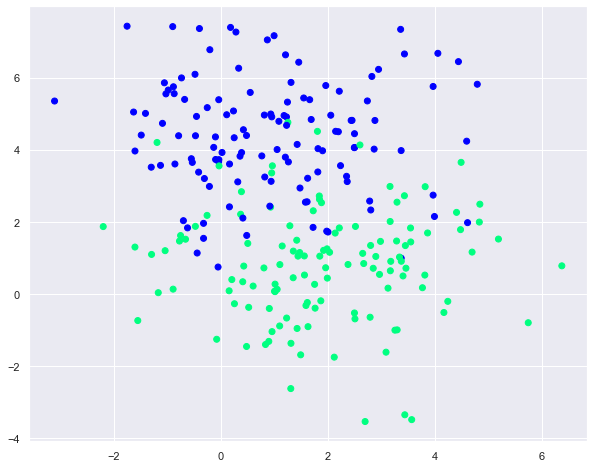

In [31]:
X, y = make_blobs(n_samples=250, centers=2,
                  random_state=0, cluster_std=1.60)
y[y == 0] = -1
tmp = np.ones(len(X))
y = tmp * y
print(y)
fig, ax = plot_api()
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy_score(y_test, y_pred)

0.8888888888888888

In [74]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [75]:
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df['Price']=boston.target
xmat=boston_df.drop('Price',axis=1)
y =boston_df['Price']
X_list = xmat.columns 
print(X_list)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


In [76]:
ulist = [1,2,3]
for index, e in enumerate(ulist):
    print(index)
    #print(e)

0
1
2


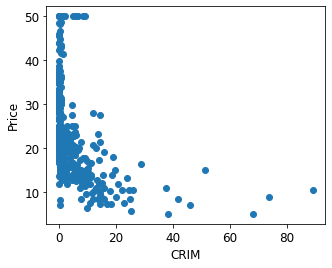

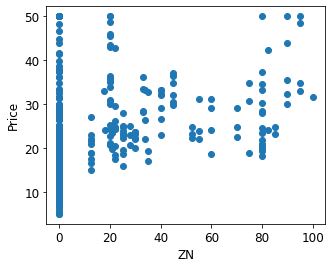

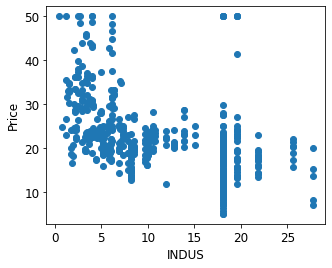

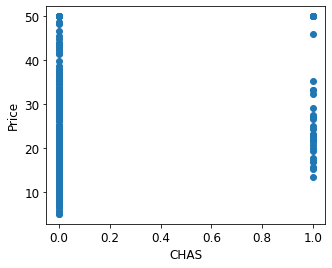

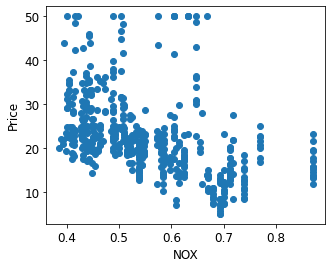

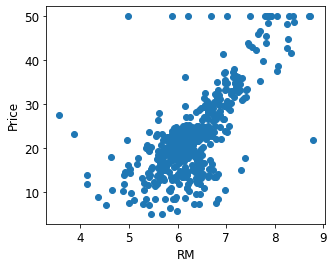

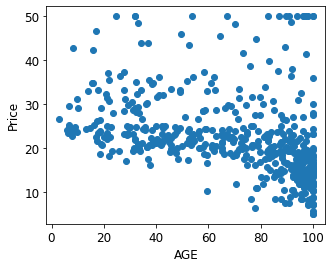

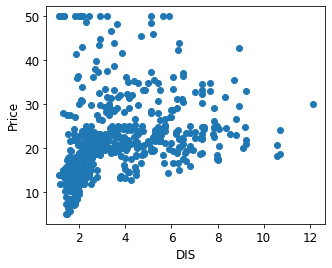

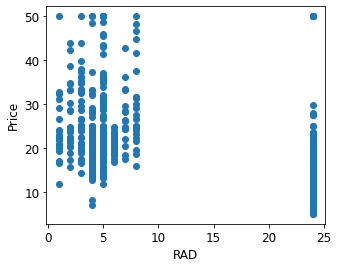

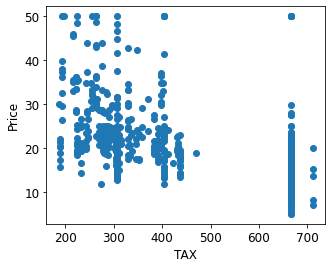

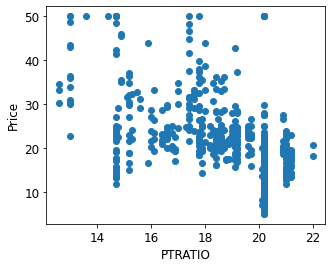

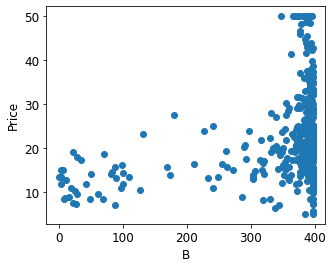

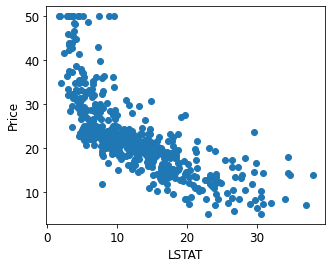

In [32]:
for index, feature_name in enumerate(boston.feature_names):
    plt.figure(figsize=(5, 4))
    plt.scatter(boston.data[:, index], boston.target)
    plt.ylabel('Price', size=12)
    plt.xlabel(feature_name, size=12)
    plt.show()

In [6]:
X_train,X_test,y_train,y_test=train_test_split(xmat,y,test_size=0.2,random_state=3)

In [13]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
test_score = rf.score(X_test, y_test)
print(test_score)
print(rf.decision_path(X_train))

0.8988488423849833
(<404x4764 sparse matrix of type '<class 'numpy.int64'>'
	with 44601 stored elements in Compressed Sparse Row format>, array([   0,  481,  962, 1431, 1902, 2361, 2832, 3331, 3814, 4299, 4764],
      dtype=int32))


In [15]:
l1 = ['a', 'b', 'c']
l2 = ['1', '2', '3']
print(list(zip(l1, l2)))

[('a', '1'), ('b', '2'), ('c', '3')]


In [17]:
def myfunc(x):
    return x[1]

print(myfunc([0,1]))

func = lambda x: x[1]
print(func([0, 1]))

1
1


In [14]:
importances = list(rf.feature_importances_)
pairs = list(zip(X_list, importances))
feature_importance = sorted(pairs, key=lambda x: x[1], reverse=True)
print(feature_importance)

[('LSTAT', 0.4803056682120763), ('RM', 0.3020427289067818), ('DIS', 0.08590528647329991), ('CRIM', 0.0376378460590558), ('NOX', 0.030318077311803353), ('AGE', 0.01902395242832143), ('PTRATIO', 0.015679102651850952), ('TAX', 0.010442844148543228), ('B', 0.007885046511183255), ('INDUS', 0.007441498336362545), ('RAD', 0.0019518752592307233), ('CHAS', 0.0009991401498934483), ('ZN', 0.00036693355159718774)]


In [11]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print(test_score)

0.7929270902369326


In [23]:
yhat = model.predict(X_train)

In [29]:
enet = ElasticNet(alpha=1.0, l1_ratio=0.7)

In [34]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

In [35]:
print(train_score)
print(test_score)
print(lasso.coef_!=0)
print(coeff_used)
print(lasso.get_params())
print(lasso.coef_)

0.72350564030834
0.7929270902369326
[ True  True  True  True  True  True  True  True  True  True  True  True
  True]
13
{'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
[-1.22093409e-01  4.84045925e-02 -6.00792200e-02  3.18091505e+00
 -1.22308414e+01  3.60789806e+00 -1.20195890e-02 -1.41327471e+00
  2.95843473e-01 -1.10077744e-02 -8.69195647e-01  1.01796984e-02
 -4.85411327e-01]


In [46]:
model = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(xmat, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)


MAE: -3.379
Config: {'alpha': 0.01}
